# Preprocessing

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('training_set_VU_DM.csv')
test = pd.read_csv('test_set_VU_DM.csv')

In [3]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,1,2.77,0.1302,5.20,7,195.32,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,1,2.20,0.0356,4.81,18,129.35,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,0,1.61,NaN,4.14,35,85.37,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,1,2.56,0.1238,5.18,3,150.05,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,1,2.83,0.1028,5.15,10,280.69,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
def get_date(df):
    
    df['date_time'] = pd.to_datetime(df['date_time'], yearfirst=True)

    df['year'] = df['date_time'].dt.year
    df['month'] = df['date_time'].dt.month
    df['dayofweek'] = df['date_time'].dt.dayofweek
    df['hour'] = df['date_time'].dt.hour
    
    df['summer'] = 0
    df.loc[(df["month"] >=6) & (df['month'] <= 8), "summer"] = 1
        
    df['winter'] = 0
    df.loc[(df["month"] >=1) & (df['month'] <= 2) | (df['month'] == 12 ), "winter"] = 1
    
    return df    

In [5]:
def new_features(df):
    
    df['starrating_diff'] = df['visitor_hist_starrating'] - df['prop_starrating']
    df['usd_diff'] = df['visitor_hist_adr_usd'] - df['price_usd']
    
    return df

In [6]:
def series2dict(series):
    
    keys = list(series.index)
    values = list(series.values)


    dict_ = dict(zip(keys, values))
    
    
    return dict_

In [7]:
def series_list_dict(series, list_):
    
    keys = list(series.index)
    values = list_
    dict_ = dict(zip(keys, values))
    
    return dict_

In [8]:
def get_score(df, num_dict, denom_dict):
    
    score = []
    prop_id = df['prop_id'].values

    for _id in prop_id:

        numerator = num_dict[_id]
        denominator = denom_dict[_id]

        score.append(numerator/denominator)
    
    return score
    

In [9]:
def hotel_quality(df):
    
    prop_id_series = df.groupby('prop_id')['prop_id'].nunique()
    booking_bool_series = df.groupby('prop_id')['booking_bool'].sum() + 1
    click_bool_series = df.groupby('prop_id')['click_bool'].sum() + 1

    prop_id_dict = series2dict(prop_id_series)
    booking_bool_dict = series2dict(booking_bool_series)
    click_bool_dict = series2dict(click_bool_series)

    booking_score = get_score(df, prop_id_dict, booking_bool_dict)
    click_score = get_score(df, prop_id_dict, click_bool_dict)

    booking_score_dict = series_list_dict(prop_id_series, booking_score)
    click_score_dict = series_list_dict(prop_id_series, click_score)

    df['booking_score'] = df['prop_id']
    df['click_score'] = df['prop_id']

    # # df = df.replace({'booking_score': booking_score_dict})

    df['booking_score'] = df['booking_score'].map( booking_score_dict )
    df['click_score'] = df['click_score'].map( click_score_dict )

    df.loc[df["booking_score"] > 0.999, 'booking_score'] = 0
    df.loc[df["click_score"] > 0.999, 'click_score'] = 0
    
    return df

    

In [10]:
def booking_monotonicity(df):
    
    booking_rating_series = df.groupby('prop_starrating')['booking_bool'].mean()
    booking_rating_series
    booking_rating_dict = series2dict(booking_rating_series)

    df['booking_rating'] = df['prop_starrating']


    df['booking_rating'] = df['booking_rating'].map( booking_rating_dict )
    df['prop_starrating_monotonic'] = df['prop_starrating'] - df['booking_rating'] 
    
    return df
    

In [11]:
def booking_mean(df):
    
    booking_mean_series = df.groupby('prop_id')['booking_bool'].mean()

    booking_mean_dict = series2dict(booking_mean_series)

    df['booking_mean'] = df['prop_id']


    df['booking_mean'] = df['booking_mean'].map( booking_mean_dict )
    
    return df

In [12]:
def normalization(df, col_name1, col_name2):
    
    series = df.groupby(col_name1)[col_name2].mean()

    dict_ = series2dict(series)

    feature_name =  col_name1 + '_' + col_name2
    df[feature_name] = df[col_name1]


    df[feature_name] = df[feature_name].map( dict_ )
    
    return df
    
 

In [13]:
def clean_data(df):
    
    df["comp1_rate"] = df["comp1_rate"].fillna(-2)
    df["comp2_rate"] = df["comp2_rate"].fillna(-2)
    df["comp3_rate"] = df["comp3_rate"].fillna(-2)
    df["comp4_rate"] = df["comp4_rate"].fillna(-2)
    df["comp5_rate"] = df["comp5_rate"].fillna(-2)
    df["comp6_rate"] = df["comp6_rate"].fillna(-2)
    df["comp7_rate"] = df["comp7_rate"].fillna(-2)
    df["comp8_rate"] = df["comp8_rate"].fillna(-2)
    
    df["comp1_inv"] = df["comp1_inv"].fillna(-2)
    df["comp2_inv"] = df["comp2_inv"].fillna(-2)
    df["comp3_inv"] = df["comp3_inv"].fillna(-2)
    df["comp4_inv"] = df["comp4_inv"].fillna(-2)
    df["comp5_inv"] = df["comp5_inv"].fillna(-2)
    df["comp6_inv"] = df["comp6_inv"].fillna(-2)
    df["comp7_inv"] = df["comp7_inv"].fillna(-2)
    df["comp8_inv"] = df["comp8_inv"].fillna(-2)
    
    
    # Apply Active Learning?
    df["prop_review_score"] = df["prop_review_score"].fillna(df["prop_review_score"].dropna().median())
    df["prop_location_score2"] = df["prop_location_score2"].fillna(df["prop_location_score2"].dropna().median())
    df["orig_destination_distance"] = df["orig_destination_distance"].fillna(df["orig_destination_distance"].dropna().median())
    df["visitor_hist_starrating"] = df["visitor_hist_starrating"].fillna(df["visitor_hist_starrating"].dropna().mean())
    df["visitor_hist_adr_usd"] = df["visitor_hist_adr_usd"].fillna(df["visitor_hist_adr_usd"].dropna().mean())
    df["srch_query_affinity_score"] = df["srch_query_affinity_score"].fillna(df["visitor_hist_adr_usd"].dropna().median())
    
    df.drop(['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff',
            'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff',
            'comp7_rate_percent_diff', 'comp8_rate_percent_diff'], axis=1, inplace=True)
    
    return None

In [14]:
def generate_dummies(df):
    
    df = pd.get_dummies(df, columns = ['site_id'])
    df = pd.get_dummies(df, columns = ['visitor_location_country_id'])
    
    df = pd.get_dummies(df, columns = ['comp1_rate'])
    df = pd.get_dummies(df, columns = ['comp2_rate'])
    df = pd.get_dummies(df, columns = ['comp3_rate'])
    df = pd.get_dummies(df, columns = ['comp4_rate'])
    df = pd.get_dummies(df, columns = ['comp5_rate'])
    df = pd.get_dummies(df, columns = ['comp6_rate'])
    df = pd.get_dummies(df, columns = ['comp7_rate'])
    df = pd.get_dummies(df, columns = ['comp8_rate'])
    
    df = pd.get_dummies(df, columns = ['comp1_inv'])
    df = pd.get_dummies(df, columns = ['comp2_inv'])
    df = pd.get_dummies(df, columns = ['comp3_inv'])
    df = pd.get_dummies(df, columns = ['comp4_inv'])
    df = pd.get_dummies(df, columns = ['comp5_inv'])
    df = pd.get_dummies(df, columns = ['comp6_inv'])
    df = pd.get_dummies(df, columns = ['comp7_inv'])
    df = pd.get_dummies(df, columns = ['comp8_inv'])
    

    
    return df

In [15]:
def correction(df):
    
    df['luxury'] = 0
    df.loc[df["price_usd"] > 5 * df["price_usd"].std(), 'luxury'] = 1
    df.loc[df["price_usd"] > 5 * df["price_usd"].std(), "price_usd"] = 5 * df["price_usd"].std()
    
#     df['log_distance'] = pd.DataFrame(np.log(train["orig_destination_distance"]))
    df['log_price_usd'] = pd.DataFrame(np.log(train["price_usd"]))
    
    return None


In [16]:
# def down_sample_negative(df):

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor

def validate_result(Y_train, Y_pred):
    # Computes MSE and ROC scores.
    print("MSE score:", mean_squared_error(Y_train, Y_pred))
    print("R-squared:", r2_score(Y_train, Y_pred))
    
    return None

def trainSet_testSet(df, target_name):
    
    df_train = df[df[target_name].isnull() == False]
    df_test = df[df[target_name].isnull() == True]
    
    return df_train, df_test

def get_features(df, pca=False, n_components=75):

    if pca == False:
        feature_names = list(df)
        feature_names = remove_features(feature_names)
        features = df[feature_names].values
        
    else:
        feature_names = list(df)
        feature_names = remove_features(feature_names)
        features = df[feature_names].values
        
        pca = PCA(n_components=n_components, random_state=1)
        features = pca.fit_transform(features)
        
    return features
    
    
def get_target(df, target_name):
    
    return df[target_name].values


def remove_features(features):
    
    to_remove = ['booking_bool', 'position', 'click_bool', 'date_time', 'Unnamed: 0', 'prop_id', 'srch_id', 
                 'prop_location_score2', 'orig_destination_distance', 'prop_review_score']
    
    
    for item in to_remove:
        try:
            features.remove(item)
        except:
            pass
    
    return features


def fill_missing(df, target_name):
    
    df_train, df_test = trainSet_testSet(df, target_name)
    X_train = get_features(df_train)
    Y_train = get_target(df_train, target_name)
    
    
#     clf = DecisionTreeRegressor(random_state=42)
#     clf = LinearRegression()
    clf = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)
    clf.fit(X_train, Y_train)
    
#     train_pred = clf.predict(X_train)
    train_pred = cross_val_predict(clf, X_train, Y_train, cv=5)
    validate_result(Y_train, train_pred)
    
    X_test = get_features(df_test)
    Y_pred = clf.predict(X_test)
    df_test[target_name] = pd.DataFrame(Y_pred)
    
    df_new = pd.concat([df_train, df_test])
    print(df_new.isna().sum())
    df_new = df_new.sort_values(['srch_id'], ascending=[True])
    
    return df_new
    
    
    
    
    

In [18]:
def divide_values(df, value1, value2):
    
    new_value = value1 + "_" + value2
    df[new_value] = df[value1] / df[value2]
    
    return df
    
def add_values(df, value1, value2):
    
    new_value = value1 + "_" + value2
    df[new_value] = df[value1] + df[value2]
    
    return df


def subtract_values(df, value1, value2):
    
    new_value = 'diff_' + value1 + "_" + value2
    df[new_value] = df[value1] - df[value2]
    
    return df

def multiply_values(df, value1, value2):
    
    new_value = value1 + "X" + value2
    df[new_value] = df[value1] * df[value2]
    
    return df
#  df['srch_adults_count'] + df['srch_children_count']

In [19]:
# clean_data(train)
# correction(train)

In [20]:
# train = hotel_quality(train)
# train = booking_monotonicity(train)
# train = booking_mean(train)
train = get_date(train)
# train = normalization(train, 'srch_id', 'booking_score')
# train = normalization(train, 'prop_id', 'booking_score')
# train = normalization(train, 'prop_country_id', 'booking_score')
# train = normalization(train, 'srch_destination_id', 'booking_score')
# train = normalization(train, 'month', 'booking_score')
# train = normalization(train, 'srch_booking_window', 'booking_score')
# train = normalization(train, 'srch_id', 'click_score')
# train = normalization(train, 'prop_id', 'click_score')
# train = normalization(train, 'prop_country_id', 'click_score')
# train = normalization(train, 'srch_destination_id', 'click_score')
# train = normalization(train, 'month', 'click_score')
# train = normalization(train, 'srch_booking_window', 'click_score')

clean_data(train)
correction(train)

train = divide_values(train, 'prop_starrating', 'price_usd')
train = divide_values(train, 'prop_review_score', 'price_usd')
train = divide_values(train, 'visitor_hist_adr_usd', 'price_usd')
train = add_values(train, 'srch_adults_count', 'srch_children_count')
train = divide_values(train, 'srch_adults_count_srch_children_count', 'price_usd')
train = subtract_values(train, 'visitor_hist_starrating', 'prop_starrating')
train = multiply_values(train, 'price_usd', 'srch_room_count')

train = multiply_values(train, 'price_usd', 'prop_location_score1')
train = multiply_values(train, 'price_usd', 'prop_location_score2')
train = multiply_values(train, 'price_usd', 'summer')
train = multiply_values(train, 'price_usd', 'winter')
train = subtract_values(train, 'log_price_usd', 'prop_log_historical_price')
train = multiply_values(train, 'diff_log_price_usd_prop_log_historical_price', 'promotion_flag')
###########################################################################################3

test = get_date(test)

clean_data(test)
correction(test)

test = divide_values(test, 'prop_starrating', 'price_usd')
test = divide_values(test, 'prop_review_score', 'price_usd')
test = divide_values(test, 'visitor_hist_adr_usd', 'price_usd')
test = add_values(test, 'srch_adults_count', 'srch_children_count')
test = divide_values(test, 'srch_adults_count_srch_children_count', 'price_usd')
test = subtract_values(test, 'visitor_hist_starrating', 'prop_starrating')
test = multiply_values(test, 'price_usd', 'srch_room_count')

test = multiply_values(test, 'price_usd', 'prop_location_score1')
test = multiply_values(test, 'price_usd', 'prop_location_score2')
test = multiply_values(test, 'price_usd', 'summer')
test = multiply_values(test, 'price_usd', 'winter')
test = subtract_values(test, 'log_price_usd', 'prop_log_historical_price')
test = multiply_values(test, 'diff_log_price_usd_prop_log_historical_price', 'promotion_flag')
test = multiply_values(test, 'price_usd', 'promotion_flag')
test = multiply_values(test, 'prop_brand_bool', 'promotion_flag')

# test = generate_dummies(test)

C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [21]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp2_rate,comp2_inv,comp3_rate,comp3_inv,comp4_rate,comp4_inv,comp5_rate,comp5_inv,comp6_rate,comp6_inv,comp7_rate,comp7_inv,comp8_rate,comp8_inv,click_bool,gross_bookings_usd,booking_bool,year,month,dayofweek,hour,summer,winter,luxury,log_price_usd,prop_starrating_price_usd,prop_review_score_price_usd,visitor_hist_adr_usd_price_usd,srch_adults_count_srch_children_count,srch_adults_count_srch_children_count_price_usd,diff_visitor_hist_starrating_prop_starrating,price_usdXsrch_room_count,price_usdXprop_location_score1,price_usdXprop_location_score2,price_usdXsummer,price_usdXwinter,diff_log_price_usd_prop_log_historical_price,diff_log_price_usd_prop_log_historical_priceXpromotion_flag
0,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,4.651767,0.028634,0.033407,1.680086,4,0.038179,0.374334,104.77,296.4991,4.588926,0.00,0.0,-0.298233,-0.000000
1,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,1.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,5.140142,0.023427,0.023427,1.030940,4,0.023427,-0.625666,170.74,375.6280,2.544026,0.00,0.0,0.110142,0.000000
2,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,5.191845,0.016685,0.025028,0.978991,4,0.022247,0.374334,179.80,395.5600,4.405100,0.00,0.0,0.271845,0.000000
3,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,-1.0,0.0,-1.0,0.0,-2.0,-2.0,0.0,1.0,-2.0,-2.0,-2.0,-2.0,-1.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,6.401536,0.003318,0.006636,0.292023,4,0.006636,1.374334,602.77,1705.8391,7.534625,0.00,0.0,2.011536,0.000000
4,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,4.966892,0.027859,0.024377,1.225955,4,0.027859,-0.625666,143.58,379.0512,17.818278,0.00,0.0,0.036892,0.000000
5,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,30184,4,4.5,1,2.77,0.1302,5.20,7,195.32,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,5.274639,0.020479,0.023039,0.901201,4,0.020479,-0.625666,195.32,541.0364,25.430664,0.00,0.0,0.074639,0.000000
6,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,44147,3,3.5,1,2.20,0.0356,4.81,18,129.35,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0,NaN,0,2013,4,3,8,0,0,0,4.862522,0.023193,0.027058,1.360825,4,0.030924,0.374334,129.35,284.5700,4.604860,0.00,0.0,0.052522,0.000000
7,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,50984,2,0.0,0,1.61,0.0690,4.14,35,85.37,0,23246,1,0,4,0,1,1,176.022659,386.60,1,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0,NaN,0,2013,4,3,8,0,0,0,4.446995,0.023427,0.000000,2.061880,4,0.046855,1.374334,85.37,137.4457,5.890530,0.00,0.0,0.306995,0.000000
8,1,2013-04-04 08:32:15,12,187,3.374334,176.022659,219,5334

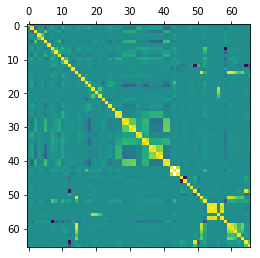

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(train.corr())
plt.show()

In [23]:
from sklearn.decomposition import PCA

def collapse_train(df, n_components):
    

    Y_list = ['click_bool', 'position', 'gross_bookings_usd', 'booking_bool', 'date_time',
             'srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id']
    
    df_Y = df[Y_list]

    X_list = list(set(list(df)) - set(Y_list))
    df_X = df[X_list]
    
    pca = PCA(n_components=n_components, svd_solver='full')
    X = pca.fit(df_X.values) 
    
    df_X_new = pd.DataFrame(list(X))
    
    df_Y = pd.concat([df_Y, df_X_new])
    
    
    return df_Y

# collapse_train(train, 30) # Unfortunately this does not work.
  

In [ ]:
train.to_csv('clean_train_v9.csv')
test.to_csv('clean_test_v9.csv')